In [25]:
# To implement clustering using K-Means, Hierarchical, and DBSCAN algorithms for segmenting customers based on their behavior
# Follow these steps:

# 1. Data Preprocessing:

# Normalize the features if needed.
# Handle missing values if any.
# 2Selecting the Number of Clusters:
# Use elbow method or silhouette score to determine the optimal number of clusters for K-Means.

# 2. Clustering Algorithms:
# Implement K-Means, Hierarchical, and DBSCAN algorithms.
# Evaluate Clustering Results:

# Visualization:
# Visualize the clusters to understand the segmentation better.
# Here's a Python code example using scikit-learn library for implementing K-Means, Hierarchical, and DBSCAN clustering algorithms.

# Analyze the clusters formed by each algorithm.
# Measure the clustering performance using metrics like silhouette score or Davies-Bouldin index.

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

In [2]:
# load Data
from google.colab import files
uploaded = files.upload()

Saving E_Commerce_Customer_Behavior.csv to E_Commerce_Customer_Behavior.csv


In [19]:
# 1. Data Preprocessing

In [5]:
# Read the file with tab delimiter
data = pd.read_csv("E_Commerce_Customer_Behavior.csv", sep='\t')

In [6]:
# Removing Duplicates
data.drop_duplicates(inplace=True)

In [7]:
# load to dataframe
df = pd.DataFrame(data)

In [10]:
# Split the string data into separate columns based on semicolon delimiter to solve issue
df = pd.DataFrame([row.split(';') for row in data],
                  columns=['account length', 'location code', 'user id', 'credit card info save',
                           'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
                           'desktop transactions', 'total product detail views', 'session duration',
                           'promotion clicks', 'avg order value', 'sale product views',
                           'discount rate per visited products', 'product detail view per app session',
                           'app transactions', 'add to cart per session', 'customer service calls', 'churn'])

# Remove the first row (header row)
df = df.iloc[1:]


In [11]:
# Load the data using read_csv with appropriate delimiter
df = pd.read_csv("E_Commerce_Customer_Behavior.csv", sep=';')

# Now, you can view the DataFrame
df.head(6)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
5,118,510,3918027,yes,no,0,223,38,19,98,221,101,"203,9",118,"9,18","6,3",6,"1,7",0,0


In [13]:
# Drop non-numeric columns if any
df.drop(['location code', 'user id', 'credit card info save', 'push status'], axis=1, inplace=True)

In [15]:
df.head(3) # see whats going on after droping non numeric numbers

,account length,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0


In [17]:
# Replace commas with dots and convert to float
df = df.replace(',', '.', regex=True)
df = df.astype(float)

# Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [21]:
 # Clustering Algorithims

In [22]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)


In [24]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

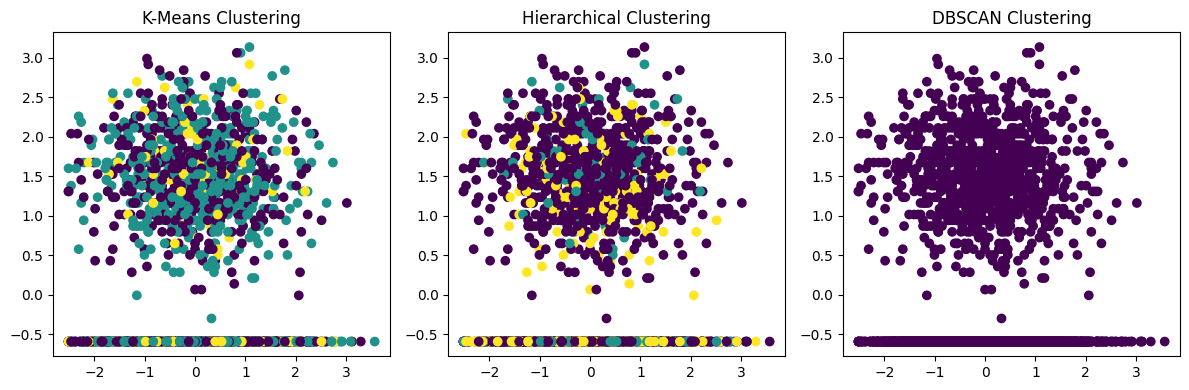

In [26]:
# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

In [28]:
# Compute silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_labels)
kmeans_db_index = davies_bouldin_score(scaled_data, kmeans_labels)

In [29]:
# Compute silhouette score for Hierarchical
hierarchical_silhouette_score = silhouette_score(scaled_data, hierarchical_labels)
hierarchical_db_index = davies_bouldin_score(scaled_data, hierarchical_labels)

In [33]:
print("K-Means Silhouette Score:", kmeans_silhouette_score)
print("K-Means Davies-Bouldin Index:", kmeans_db_index)
print()
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score)
print("Hierarchical Davies-Bouldin Index:", hierarchical_db_index)

K-Means Silhouette Score: 0.08651628684717136
K-Means Davies-Bouldin Index: 2.8059548975891713

Hierarchical Silhouette Score: 0.050666451363513054
Hierarchical Davies-Bouldin Index: 3.459778538958622


In [36]:
# K-Means Clustering:

# Silhouette Score (0.087): The silhouette score measures how similar an object is to its own cluster compared to other clusters.
#  A score close to 1 indicates that the clusters are well-separated.
# In this case, a silhouette score of 0.087 suggests that the clusters formed by K-Means have some separation,
# but there is room for improvement.

# Davies-Bouldin Index (2.806): The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.
# A lower index value indicates better clustering, with values closer to zero representing better separation between clusters.
#  A value of 2.806 suggests moderate separation between clusters but could be improved.

# Hierarchical Clustering:
# Silhouette Score (0.051): The silhouette score for hierarchical clustering is lower compared to K-Means,
# indicating less distinct separation between clusters.
# It suggests that the clusters formed by hierarchical clustering might have some overlap or less cohesion within clusters.

# Davies-Bouldin Index (3.460): The Davies-Bouldin index for hierarchical clustering is higher than that of K-Means,
# indicating less desirable clustering. A higher index suggests less distinct and more scattered clusters,
# which could be due to the hierarchical nature of the clustering algorithm.


# Interpretation in the Context of Customer Behavior:

# The relatively low silhouette scores and moderate Davies-Bouldin index values for both K-Means and Hierarchical clustering suggest
# that the clustering algorithms may not have fully captured the underlying patterns in customer behavior.

# It's possible that the features used for clustering might not be strongly indicative of distinct customer segments,
# or the clustering algorithms may not be the most suitable for this specific dataset.

# Further analysis, feature engineering, or trying different clustering algorithms may be necessary to obtain more meaningful
# insights into customer behavior and to achieve better segmentation results.

# In summary, while both K-Means and Hierarchical clustering provide some level of segmentation,
# the results indicate that there is room for improvement in capturing distinct customer behavior patterns.
# Experimentation with different clustering techniques and feature sets may lead to better segmentation outcomes.






In [37]:
# Adjust parameters for DBSCAN
eps_values = [0.1, 0.5, 1.0]  # Example values to try for eps
min_samples_values = [5, 10, 15]  # Example values to try for min_samples

best_dbscan_db_index = float('inf')  # Initialize with a high value

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)

        # Count the number of clusters (excluding noise, labeled as -1)
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if num_clusters > 1:
            dbscan_db_index = davies_bouldin_score(scaled_data, dbscan_labels)
            if dbscan_db_index < best_dbscan_db_index:
                best_dbscan_db_index = dbscan_db_index
                best_eps = eps
                best_min_samples = min_samples

if best_dbscan_db_index != float('inf'):
    print("Best DBSCAN Parameters:")
    print("eps:", best_eps)
    print("min_samples:", best_min_samples)
    print("DBSCAN Davies-Bouldin Index:", best_dbscan_db_index)
else:
    print("DBSCAN: Unable to find suitable parameters to form multiple clusters.")


DBSCAN: Unable to find suitable parameters to form multiple clusters.


In [38]:
# Take this as a challenge go through m,y code find the error in logic and help me solve this DBSCAN
# i can do it but its late and i dont have the energy am moving on to the next project